# The Central Limit Theorem

The *Central Limit Theorem* states that if we draw a simple random sample of size $n$ from any population with mean $\mu$ and standard deviation $\sigma$, if $n$ is large the distribuion of the sample means is approximately normal of the form

$$N(\mu, \frac{\sigma}{n})$$

This activity is meant to offer an example of the central limit theorem in action, and the effect of using different sample sizes in forming the distribution of sample means. 

### Baseball Salaries

![](images/baseballs.png)


The dataset below represents Major League Baseball player salaries from the year 2020, and was gathered from USA Today's databases. Below, the dataset is loaded and we examine the features and datatypes. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/tmp/ipykernel_55149/347984750.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#read in the data
baseball_salaries = pd.read_csv('data/baseball.csv', index_col=0)

In [3]:
#Examine the .info()
baseball_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797 entries, 1 to 797
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   team         797 non-null    object
 1   leagueID     797 non-null    object
 2   player       797 non-null    object
 3   salary       797 non-null    int64 
 4   position     797 non-null    object
 5   gamesplayed  797 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 43.6+ KB


In [4]:
#First few rows
baseball_salaries.head()

,team,leagueID,player,salary,position,gamesplayed
1,ANA,AL,anderga0,6200000,CF,112
2,ANA,AL,colonba0,11000000,P,3
3,ANA,AL,davanje0,375000,CF,108
4,ANA,AL,donnebr0,375000,P,5
5,ANA,AL,eckstda0,2150000,SS,142


In [193]:
print(baseball_salaries['salary'].mean())
print(baseball_salaries['salary'].median())
print(baseball_salaries['salary'].quantile(0.70))

2497668.6850690087
800000.0
2500000.0


### Task

Our goal is to take samples from the salary data and build a distribution of these sample means.  To begin, draw a histogram of the salaries.  Note the skew and lack of normality in this distribution.    

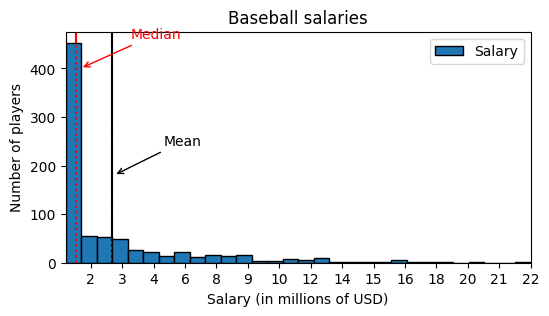

In [194]:
#histogram of the salaries
from matplotlib import ticker

def fmt_two_digits(x, pos):
    return f'{x/1000000:.0f}'

f, ax = plt.subplots(figsize=(6,3))


ax.axvline(x = baseball_salaries['salary'].median(), c='r', zorder=1)
ax.axvline(x = baseball_salaries['salary'].median(), c='r', ls=':', zorder=2)

ax.axvline(x = baseball_salaries['salary'].mean(), c='k', zorder=1)
ax.axvline(x = baseball_salaries['salary'].mean(), c='k', ls=':', zorder=2)
ax.hist(baseball_salaries['salary'], bins=30, edgecolor='k', label='Salary')

ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_two_digits))
ax.xaxis.set_major_locator(ticker.MaxNLocator(15))

ax.set_xlim(baseball_salaries['salary'].min(), baseball_salaries['salary'].max())

ax.annotate('Mean', xy=(2.6e6, 180), xytext=(50, 30), textcoords='offset pixels', arrowprops=dict(arrowstyle='->'))
ax.annotate('Median', xy=(1.0e6, 400), xytext=(50, 30), color='r', textcoords='offset pixels', arrowprops=dict(edgecolor='r', arrowstyle='->'))

ax.set_title('Baseball salaries')
ax.set_xlabel('Salary (in millions of USD)')
ax.set_ylabel('Number of players')

plt.legend()
plt.show()

### Taking Samples

Pandas DataFrame's have built in methods for taking random samples with replacement.  The `.sample()` method is demonstrated below.

In [6]:
baseball_salaries['salary'].sample(4)

335     325000
581    8000000
356     306500
219     305200
Name: salary, dtype: int64

### Sample Means

Now, use this method to repeatedly take samples and build a list of sample means.  As a starting place let us take 1000 samples of size 5 and draw the histogram of the sample means.  What is the mean and standard deviation? 

In [178]:
#empty list for sample means
sample_means = {}
sample_sizes = [5, 10, 30, 70, 100]

for s in sample_sizes:
    sample_means[s] = []
    for i in range(1000):
        sample_means[s].append(baseball_salaries['salary'].sample(s).mean())

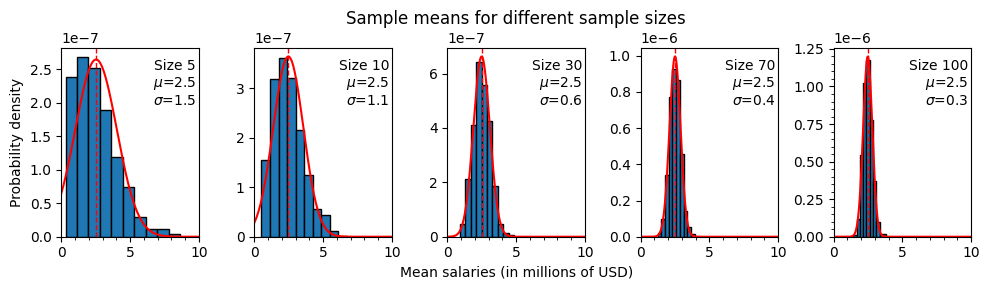

2.4976686850690086


In [180]:
#histogram of the salaries
import scipy as sp

f, axl = plt.subplots(1, len(sample_sizes), figsize=(10, 3), sharex=True)

axl = axl.flatten()

axl[2].set_title(f'Sample means for different sample sizes')

for idx, ssize in enumerate(sample_sizes):
    ax = axl[idx]

    mean = np.mean(sample_means[ssize])
    std = np.std(sample_means[ssize])

    distr = sp.stats.norm(loc=mean, scale=std)
    x = np.linspace(0, 10000000, 500)

    ax.hist(sample_means[ssize], density=True, bins=10, edgecolor='k')
    ax.axvline(x = mean, ls='--', c='red', lw=1)
    ax.plot(x, distr.pdf(x), c='r')

    ax.set_xlim(0, 10e6)

    # ax.tick_params(axis='y', which='both', labelleft=False, left=False)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(fmt_two_digits))
    

    ax.text(0.98, 0.94, f'Size {ssize}\n$\\mu$={mean/1000000:.1f}\n$\\sigma$={std/1000000:.1f}', transform=ax.transAxes, horizontalalignment='right', verticalalignment='top')

axl[0].set_ylabel('Probability density')
axl[2].set_xlabel('Mean salaries (in millions of USD)')


plt.minorticks_on()
plt.tight_layout()
plt.show()

print(baseball_salaries['salary'].mean()/1000000)

Repeat the above exercise with samples of size:

- 10
- 25
- 50
- 100

Your discussion post should explain how the distribution of these sample means changes as the sample size changes, and how the mean and standard deviation of the distributions change.